# MAPTA User Notebook

To use this notebook and you have to do is changing the variable input_text to whichever sentence you wish you analyze and then at the top menu clicking Cell → Run All

## Load Libraries

In [53]:
# MAPTA
from mapta import Mapta

# Plotting Libraries
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns

# Natural Langauge Processing
from nrclex import NRCLex
import re
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Data Manipulation
import pandas as pd

## Instantiate Model

In [ ]:
model = Mapta.MAPTA()

## Define the Input Text to Analyze

In [54]:
text = "I love injecting ecstasy in my veins while hanging out with my polysexual friends"

## Get Predictions

In [ ]:
# Predict
output = model.predict(text)

# Results
print(f'LGBT score: {output[0]}')
print(f'Drug score: {output[1]}')

## Run Emotion and Sentiment Analysis

In [55]:
# Set stopwords
stop = stopwords.words('english')

# Lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to clean stopwords
def clean_sentence(sentence):
    clean = ' '.join([re.sub(r'[^\w\s]','',word.strip()) for word in sentence.split() if re.sub(r'[^\w\s]','',word.strip()) not in stop]).lower()
    clean = ' '.join([lemmatizer.lemmatize(word) for word in clean.split() if len(word)>1 and 'http' not in word])
    if clean != 'nan':
        return clean

In [56]:
# Function to extract affects in parallel
def get_affect(text):
    affect_dict = NRCLex(text).affect_frequencies
    if 'anticipation' not in affect_dict:
        affect_dict['anticipation'] = np.NaN
    return affect_dict

In [57]:
# Preprocess the text
clean_text = clean_sentence(text)

# Extract emotions and sentiments from text
affects = get_affect(clean_text)

# Convert affects to DataFrame for easier plotting
df_affects = pd.DataFrame.from_dict(affects, orient='index', columns=['scores'])

In [58]:
# Split emotions and sentiments
df_emotions = df_affects.filter(['positive', 'negative'], axis=0)
df_sentiments = df_affects.filter(['fear', 'anger', 'trust', 'surprise', 'sadness', 'disgust', 'joy', 'anticipation'], axis=0)

# Calculate relative percentages
df_emotions['percentage'] = df_emotions['scores']/df_emotions['scores'].sum()
df_sentiments['percentage'] = df_sentiments['scores']/df_sentiments['scores'].sum()

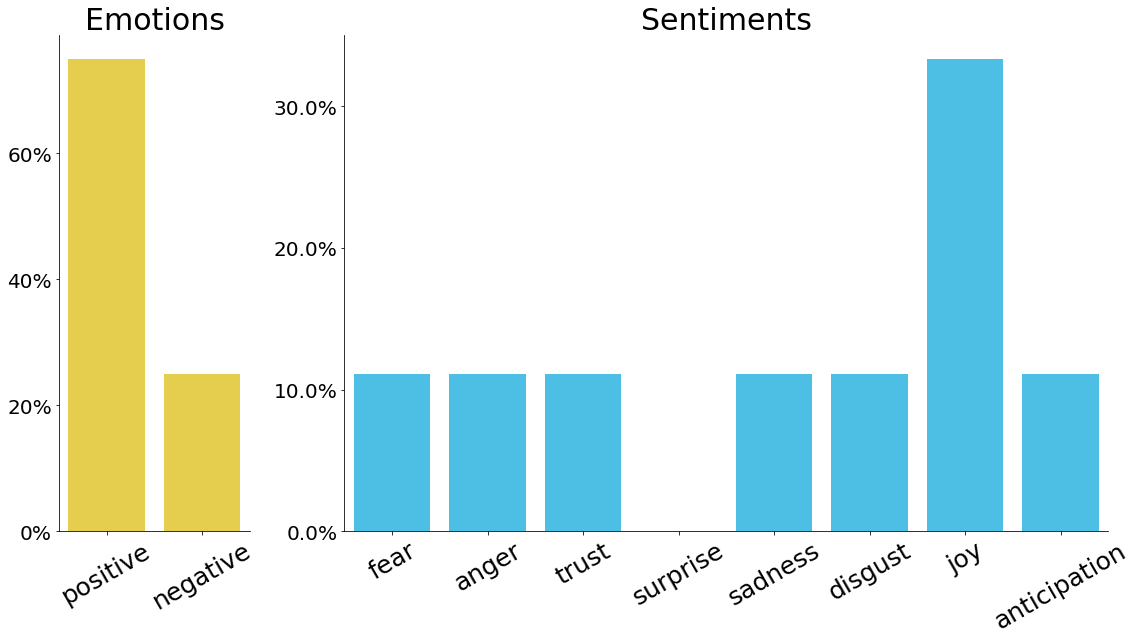

In [61]:
fig, ax = plt.subplots(ncols=2, figsize=(16,9), gridspec_kw={'width_ratios': [1, 4]})

fig.sca(ax[0])
sns.barplot(data=df_emotions, x=df_emotions.index, y='percentage', color='gold', alpha=0.8)
ax[0].yaxis.set_major_locator(mtick.MultipleLocator(0.2))
ax[0].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
plt.xticks(fontsize=25, rotation=30)
plt.yticks(fontsize=20)
plt.xlabel(None)
plt.ylabel('', fontsize=30, weight='normal', labelpad=20)
plt.title('Emotions', size=30, weight='normal')

fig.sca(ax[1])
sns.barplot(data=df_sentiments, x=df_sentiments.index, y='percentage', color='deepskyblue', alpha=0.8)
ax[1].yaxis.set_major_locator(mtick.MultipleLocator(0.1))
ax[1].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
plt.xticks(fontsize=25, rotation=30)
plt.yticks(fontsize=20)
plt.xlabel(None)
plt.ylabel('', fontsize=30, weight='normal', labelpad=20)
plt.title('Sentiments', size=30, weight='normal')

fig.align_xlabels(ax)
fig.tight_layout()
plt.show()